In [5]:
import os
os.chdir("D:\Abhinav Tar Files\Snapshots")

In [6]:
import numpy as np
from ReadFile import Read
from CenterOfMass2 import CenterOfMass
import matplotlib.pyplot as plt
import itertools

G = 4.498e-6  # kpc^3 / (1e10 Msun * Myr^2)

def kinetic_energy(masses, velocities):
    """Compute total kinetic energy K = 0.5 * sum(m*v^2)"""
    v2 = np.sum(velocities**2, axis=1)
    return 0.5 * np.sum(masses * v2)

def potential_energy(positions, masses):
    """Compute approximate total potential energy U = -G * sum_{i<j} m_i*m_j / r_ij"""
    U = 0.0
    for i, j in itertools.combinations(range(len(masses)), 2):
        r = np.linalg.norm(positions[i] - positions[j])
        if r > 0:
            U -= G * masses[i] * masses[j] / r
    return U

snapshots = np.arange(0, 802)
K_series = np.zeros(len(snapshots))
U_series = np.zeros(len(snapshots))
virial_ratio = np.zeros(len(snapshots))

count = 0
for idx, snap in enumerate(snapshots):
    mw_file = f"MW_{snap:03d}.txt"
    m31_file = f"M31_{snap:03d}.txt"

    MW = CenterOfMass(mw_file, 1)
    M31 = CenterOfMass(m31_file, 1)

    x = np.concatenate((MW.x, M31.x))
    y = np.concatenate((MW.y, M31.y))
    z = np.concatenate((MW.z, M31.z))
    vx = np.concatenate((MW.vx, M31.vx))
    vy = np.concatenate((MW.vy, M31.vy))
    vz = np.concatenate((MW.vz, M31.vz))
    m = np.concatenate((MW.m, M31.m))

    pos = np.vstack((x, y, z)).T
    vel = np.vstack((vx, vy, vz)).T

    # Center on MW COM
    xcom, ycom, zcom = MW.COMdefine(x, y, z, m)
    vxcom, vycom, vzcom = MW.COMdefine(vx, vy, vz, m)
    pos -= np.array([xcom, ycom, zcom])
    vel -= np.array([vxcom, vycom, vzcom])

    K_series[idx] = kinetic_energy(m, vel)
    U_series[idx] = potential_energy(pos, m)
    virial_ratio[idx] = 2 * K_series[idx] / np.abs(U_series[idx])

    count += 1
    print(f"Processed {count}/{len(snapshots)} snapshots (last = {snap})")

# Plot results
plt.figure(figsize=(10,6))
plt.plot(snapshots, K_series, label="Kinetic Energy K")
plt.plot(snapshots, np.abs(U_series), label="|Potential Energy U|")
plt.plot(snapshots, virial_ratio, label="Virial Ratio 2K/|U|")
plt.xlabel("Snapshot Number")
plt.ylabel("Energy / Ratio (in 1e10 Msun, kpc, Myr units)")
plt.title("Energy Evolution of MW+M31 Halo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("halo_energy_evolution.png", dpi=300)
plt.show()


Processed 1/802 snapshots (last = 0)


OSError: [Errno 22] Invalid argument: 'MW_001.txt'

Current working directory: D:\Abhinav Tar Files\Snapshots


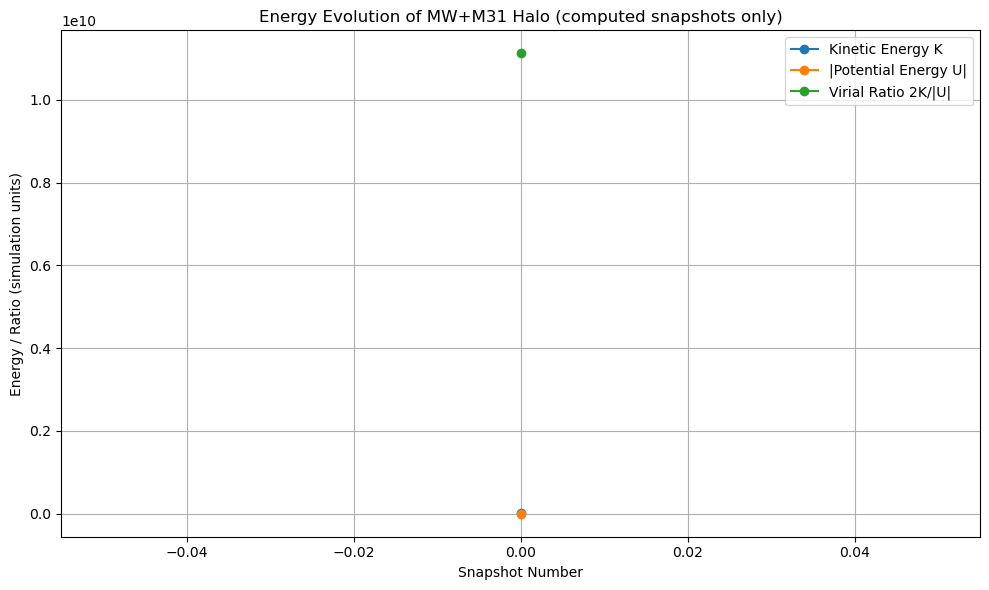

Saved to: C:\Users\abhiv\halo_energy_partial.png


In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Check where we are
print("Current working directory:", os.getcwd())

# Choose a guaranteed writable location
outdir = os.path.expanduser("~")
outfile = os.path.join(outdir, "halo_energy_partial.png")

valid = slice(0, count)

plt.figure(figsize=(10,6))
plt.plot(snapshots[valid], K_series[valid], label="Kinetic Energy K", marker='o')
plt.plot(snapshots[valid], np.abs(U_series[valid]), label="|Potential Energy U|", marker='o')
plt.plot(snapshots[valid], virial_ratio[valid], label="Virial Ratio 2K/|U|", marker='o')

plt.xlabel("Snapshot Number")
plt.ylabel("Energy / Ratio (simulation units)")
plt.title("Energy Evolution of MW+M31 Halo (computed snapshots only)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig(outfile, dpi=300)
plt.show()

print("Saved to:", outfile)


In [10]:
start = count  # this is 1

for idx, snap in enumerate(snapshots[start:], start=start):
    mw_file = f"MW_{snap:03d}.txt"
    m31_file = f"M31_{snap:03d}.txt"

    try:
        MW = CenterOfMass(mw_file, 1)
        M31 = CenterOfMass(m31_file, 1)
    except OSError as e:
        print(f"Skipping snapshot {snap}: {e}")
        continue

    x = np.concatenate((MW.x, M31.x))
    y = np.concatenate((MW.y, M31.y))
    z = np.concatenate((MW.z, M31.z))
    vx = np.concatenate((MW.vx, M31.vx))
    vy = np.concatenate((MW.vy, M31.vy))
    vz = np.concatenate((MW.vz, M31.vz))
    m = np.concatenate((MW.m, M31.m))

    pos = np.vstack((x, y, z)).T
    vel = np.vstack((vx, vy, vz)).T

    xcom, ycom, zcom = MW.COMdefine(x, y, z, m)
    vxcom, vycom, vzcom = MW.COMdefine(vx, vy, vz, m)
    pos -= np.array([xcom, ycom, zcom])
    vel -= np.array([vxcom, vycom, vzcom])

    K_series[idx] = kinetic_energy(m, vel)
    U_series[idx] = potential_energy(pos, m)
    virial_ratio[idx] = 2 * K_series[idx] / np.abs(U_series[idx])

    count += 1
    print(f"Processed {count}/{len(snapshots)} snapshots (last = {snap})")


Skipping snapshot 1: [Errno 22] Invalid argument: 'MW_001.txt'
Skipping snapshot 2: [Errno 22] Invalid argument: 'MW_002.txt'
Skipping snapshot 3: [Errno 22] Invalid argument: 'MW_003.txt'
Skipping snapshot 4: [Errno 22] Invalid argument: 'MW_004.txt'
Skipping snapshot 5: [Errno 22] Invalid argument: 'MW_005.txt'
Skipping snapshot 6: [Errno 22] Invalid argument: 'MW_006.txt'
Skipping snapshot 7: [Errno 22] Invalid argument: 'MW_007.txt'
Skipping snapshot 8: [Errno 22] Invalid argument: 'MW_008.txt'
Skipping snapshot 9: [Errno 22] Invalid argument: 'MW_009.txt'
Skipping snapshot 10: [Errno 22] Invalid argument: 'MW_010.txt'
Skipping snapshot 11: [Errno 22] Invalid argument: 'MW_011.txt'
Skipping snapshot 12: [Errno 22] Invalid argument: 'MW_012.txt'
Skipping snapshot 13: [Errno 22] Invalid argument: 'MW_013.txt'
Skipping snapshot 14: [Errno 22] Invalid argument: 'MW_014.txt'
Skipping snapshot 15: [Errno 22] Invalid argument: 'MW_015.txt'
Skipping snapshot 16: [Errno 22] Invalid argument

In [11]:
import os
print(os.getcwd())
print(os.listdir())


D:\Abhinav Tar Files\Snapshots
['MW_325.txt', 'M31_000.txt', 'M31_001.txt', 'M31_002.txt', 'M31_003.txt', 'M31_004.txt', 'M31_005.txt', 'M31_006.txt', 'M31_007.txt', 'M31_008.txt', 'M31_009.txt', 'M31_010.txt', 'M31_011.txt', 'M31_012.txt', 'M31_013.txt', 'M31_014.txt', 'M31_015.txt', 'M31_016.txt', 'M31_017.txt', 'M31_018.txt', 'M31_019.txt', 'M31_020.txt', 'M31_021.txt', 'M31_022.txt', 'M31_023.txt', 'M31_024.txt', 'M31_025.txt', 'M31_026.txt', 'M31_027.txt', 'M31_028.txt', 'M31_029.txt', 'M31_030.txt', 'M31_031.txt', 'M31_032.txt', 'M31_033.txt', 'M31_034.txt', 'M31_035.txt', 'M31_036.txt', 'M31_037.txt', 'M31_038.txt', 'M31_039.txt', 'M31_040.txt', 'M31_041.txt', 'M31_042.txt', 'M31_043.txt', 'M31_044.txt', 'M31_045.txt', 'M31_046.txt', 'M31_047.txt', 'M31_048.txt', 'M31_049.txt', 'M31_050.txt', 'M31_051.txt', 'M31_052.txt', 'M31_053.txt', 'M31_054.txt', 'M31_055.txt', 'M31_056.txt', 'M31_057.txt', 'M31_058.txt', 'M31_059.txt', 'M31_060.txt', 'M31_061.txt', 'M31_062.txt', 'M31_063.

In [12]:

mw_snaps  = sorted(int(f[3:6]) for f in os.listdir() if f.startswith("MW_")  and f.endswith(".txt"))
m31_snaps = sorted(int(f[4:7]) for f in os.listdir() if f.startswith("M31_") and f.endswith(".txt"))

valid_snaps = sorted(set(mw_snaps) & set(m31_snaps))

print("Total valid snapshots:", len(valid_snaps))
print("First 10:", valid_snaps[:10])
print("Last 10:", valid_snaps[-10:])


Total valid snapshots: 802
First 10: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Last 10: [792, 793, 794, 795, 796, 797, 798, 799, 800, 801]
